In [1]:
##Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno
from scipy.stats import chi2_contingency
from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [2]:
##Reading the .xlsm files provided and converting to dataframe
HEALTH_CHART_FILE_PATH = "E:\\Projects\\Infogain_usecase\\Health_Data_Analysis.xlsm"
PHYSICAL_ACTIVITY_FILE_PATH = "E:\\Projects\\Infogain_usecase\\Physical_Activity_Analysis.xlsm"
df_health_chart = pd.read_excel(HEALTH_CHART_FILE_PATH,engine="openpyxl")
df_physical_activity = pd.read_excel(PHYSICAL_ACTIVITY_FILE_PATH,engine="openpyxl")

In [3]:
##Getting statistical measures for df_physical_activity
df_physical_activity.describe()

,Patient_Number,Day_Number,Physical_activity
count,20000.000000,20000.000000,16159.000000
mean,1000.500000,5.500000,25353.499969
std,577.364631,2.872353,9885.999907
min,1.000000,1.000000,628.000000
25%,500.750000,3.000000,18564.000000
50%,1000.500000,5.500000,25488.000000
75%,1500.250000,8.000000,32080.000000
max,2000.000000,10.000000,49980.000000


In [4]:
##Dropping column "Day_Number" and grouping according to column "Patient_Number" and taking the mean value 
df_physical_activity_new = df_physical_activity.drop(columns = "Day_Number").groupby("Patient_Number").mean().reset_index()

In [5]:
##Checking the modified dataframe
df_physical_activity_new.head()

,Patient_Number,Physical_activity
0,1,23295.888889
1,2,27963.625000
2,3,22868.571429
3,4,28919.428571
4,5,21660.333333


In [6]:
##Merging both the dataframes to a single one based on column "Patient_Number"
df_merged = pd.merge(df_physical_activity_new,df_health_chart,on="Patient_Number",how ="inner")

In [7]:
##Checking the new dataframe
df_merged.head()

,Patient_Number,Physical_activity,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,23295.888889,1,11.28,0.90,34,23,1,1.0,0,48071,NaN,2,1,1
1,2,27963.625000,0,9.75,0.23,54,33,1,NaN,0,25333,205.0,3,0,0
2,3,22868.571429,1,10.79,0.91,70,49,0,NaN,0,29465,67.0,2,1,0
3,4,28919.428571,0,11.00,0.43,71,50,0,NaN,0,7439,242.0,1,0,0
4,5,21660.333333,1,14.17,0.83,52,19,0,NaN,0,49644,397.0,2,0,0


In [8]:
##Checking for data skewness
skewness = df_merged.skew()
print(skewness)

Patient_Number                   0.000000
Physical_activity                0.007066
Blood_Pressure_Abnormality       0.026022
Level_of_Hemoglobin              0.657066
Genetic_Pedigree_Coefficient     0.015177
Age                              0.021178
BMI                             -0.017555
Sex                              0.016013
Pregnancy                        0.200771
Smoking                         -0.038035
salt_content_in_the_diet        -0.021798
alcohol_consumption_per_day     -0.008259
Level_of_Stress                 -0.023178
Chronic_kidney_disease           0.599658
Adrenal_and_thyroid_disorders    0.883956
dtype: float64


In [9]:
##Checking the count of null values in each column
df_merged.isnull().sum()

Patient_Number                      0
Physical_activity                   0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [10]:
#Dropping all null values in Genetic_Pedigree_Coefficient
df_merged = df_merged.dropna(subset="Genetic_Pedigree_Coefficient")

In [11]:
df_merged.head()

,Patient_Number,Physical_activity,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,23295.888889,1,11.28,0.90,34,23,1,1.0,0,48071,NaN,2,1,1
1,2,27963.625000,0,9.75,0.23,54,33,1,NaN,0,25333,205.0,3,0,0
2,3,22868.571429,1,10.79,0.91,70,49,0,NaN,0,29465,67.0,2,1,0
3,4,28919.428571,0,11.00,0.43,71,50,0,NaN,0,7439,242.0,1,0,0
4,5,21660.333333,1,14.17,0.83,52,19,0,NaN,0,49644,397.0,2,0,0


In [12]:
##Removing default index and taking column Patient_Number as index
df_merged.set_index("Patient_Number",inplace=True)

In [13]:
df_merged.shape

(1908, 14)

In [14]:
df_merged.isnull().sum()

Physical_activity                   0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient        0
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1491
Smoking                             0
salt_content_in_the_diet            0
alcohol_consumption_per_day       231
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [15]:
len(df_merged)

1908

In [16]:
##Getting percentage of missing values
df_merged_missing_percent = df_merged.isnull().sum()/len(df_merged)

In [17]:
df_merged_missing_percent

Physical_activity                0.000000
Blood_Pressure_Abnormality       0.000000
Level_of_Hemoglobin              0.000000
Genetic_Pedigree_Coefficient     0.000000
Age                              0.000000
BMI                              0.000000
Sex                              0.000000
Pregnancy                        0.781447
Smoking                          0.000000
salt_content_in_the_diet         0.000000
alcohol_consumption_per_day      0.121069
Level_of_Stress                  0.000000
Chronic_kidney_disease           0.000000
Adrenal_and_thyroid_disorders    0.000000
dtype: float64

In [18]:
##If gender is male, pregnancy = 0
df_merged.loc[df_merged['Sex'] == 0, 'Pregnancy'] = 0

In [19]:
df_merged.isnull().sum()

Physical_activity                  0
Blood_Pressure_Abnormality         0
Level_of_Hemoglobin                0
Genetic_Pedigree_Coefficient       0
Age                                0
BMI                                0
Sex                                0
Pregnancy                        524
Smoking                            0
salt_content_in_the_diet           0
alcohol_consumption_per_day      231
Level_of_Stress                    0
Chronic_kidney_disease             0
Adrenal_and_thyroid_disorders      0
dtype: int64

In [20]:
##If age>60, pregnancy = 0
df_merged.loc[df_merged['Age'] >= 60, 'Pregnancy'] = 0

In [21]:
df_merged.isnull().sum()

Physical_activity                  0
Blood_Pressure_Abnormality         0
Level_of_Hemoglobin                0
Genetic_Pedigree_Coefficient       0
Age                                0
BMI                                0
Sex                                0
Pregnancy                        237
Smoking                            0
salt_content_in_the_diet           0
alcohol_consumption_per_day      231
Level_of_Stress                    0
Chronic_kidney_disease             0
Adrenal_and_thyroid_disorders      0
dtype: int64

In [22]:
##Filling rest of the null values with the mode
mode_pregnancy = df_merged['Pregnancy'].mode()[0]
df_merged['Pregnancy'].fillna(mode_pregnancy, inplace=True)
df_merged.isnull().sum()

C:\Users\Ann S Vettoor\AppData\Local\Temp\ipykernel_2528\2132894577.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged['Pregnancy'].fillna(mode_pregnancy, inplace=True)


Physical_activity                  0
Blood_Pressure_Abnormality         0
Level_of_Hemoglobin                0
Genetic_Pedigree_Coefficient       0
Age                                0
BMI                                0
Sex                                0
Pregnancy                          0
Smoking                            0
salt_content_in_the_diet           0
alcohol_consumption_per_day      231
Level_of_Stress                    0
Chronic_kidney_disease             0
Adrenal_and_thyroid_disorders      0
dtype: int64

In [23]:
print(df_merged['alcohol_consumption_per_day'].value_counts())

alcohol_consumption_per_day
253.0    11
302.0    10
401.0    10
347.0     9
144.0     9
         ..
406.0     1
346.0     1
274.0     1
241.0     1
363.0     1
Name: count, Length: 487, dtype: int64


<Axes: >

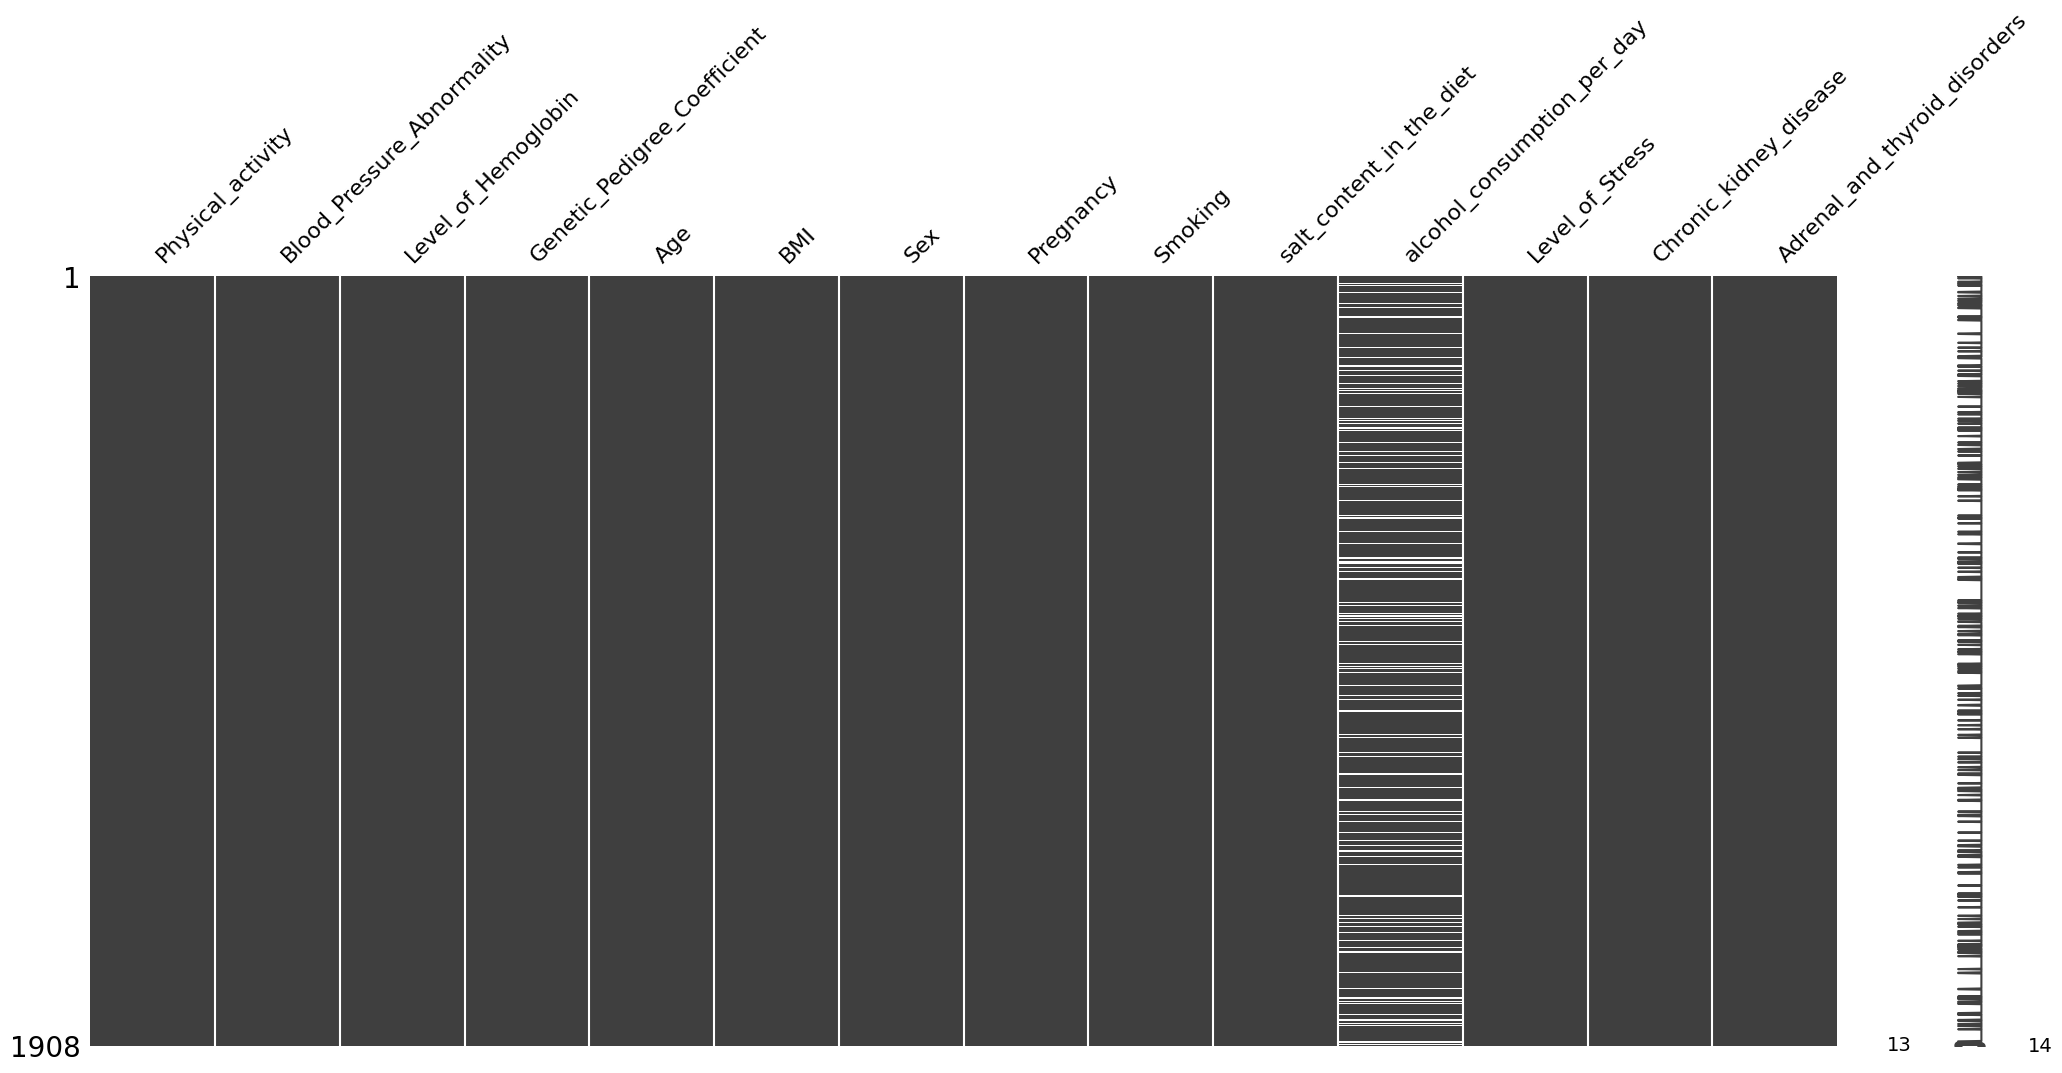

In [24]:
##Using missingno library to visualise emptiness
msno.matrix(df_merged)

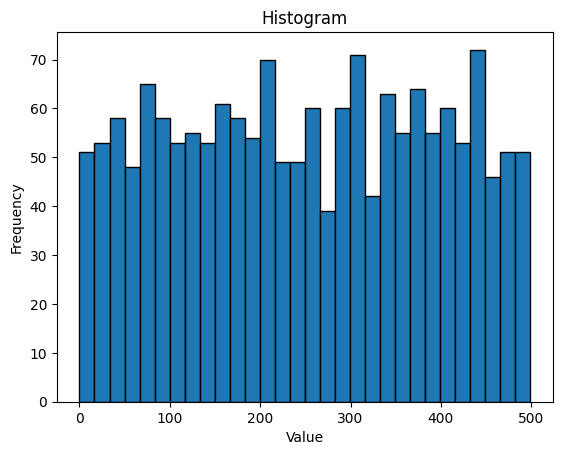

In [25]:
plt.hist(df_merged['alcohol_consumption_per_day'], bins=30, edgecolor='black')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


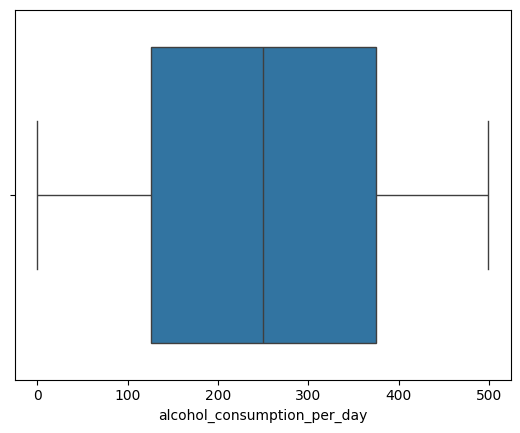

In [26]:
sns.boxplot(x=df_merged['alcohol_consumption_per_day'])
plt.show()

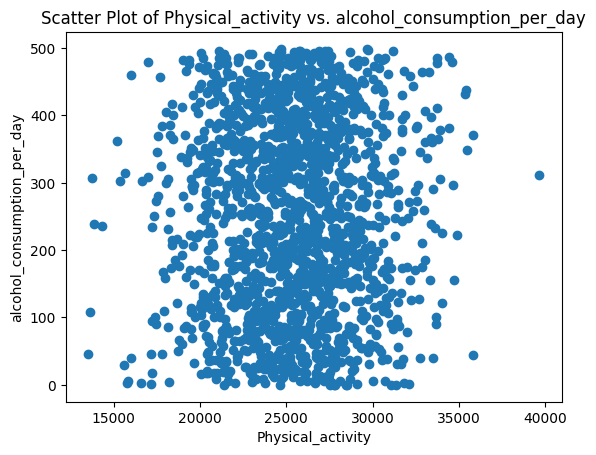

In [28]:
plt.scatter(df_merged['Physical_activity'], df_merged['alcohol_consumption_per_day'])
plt.xlabel('Physical_activity')
plt.ylabel('alcohol_consumption_per_day')
plt.title('Scatter Plot of Physical_activity vs. alcohol_consumption_per_day')
plt.show()

In [29]:
df_merged["alcohol_consumption_per_day"].describe()

count    1677.000000
mean      249.852713
std       143.140643
min         0.000000
25%       126.000000
50%       250.000000
75%       375.000000
max       499.000000
Name: alcohol_consumption_per_day, dtype: float64

In [30]:
##Filling missing alcohol consumption rows with mean value
mean_alcohol_consumption_per_day = df_merged['alcohol_consumption_per_day'].mean()
df_merged.fillna(mean_alcohol_consumption_per_day, inplace=True)

In [31]:
df_merged.isnull().sum()

Physical_activity                0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

In [32]:
df_merged.describe()

,Physical_activity,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
count,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000
mean,25315.753747,0.501572,11.706887,0.494817,46.517296,30.054507,0.493187,0.099057,0.509434,24829.114256,249.852713,2.021488,0.362159,0.303983
std,3652.678681,0.500129,2.183418,0.291736,17.065444,11.742927,0.500085,0.298816,0.500042,14236.878482,134.191382,0.823144,0.480751,0.460096
min,12100.000000,0.000000,8.100000,0.000000,18.000000,10.000000,0.000000,0.000000,0.000000,22.000000,0.000000,1.000000,0.000000,0.000000
25%,22897.758333,0.000000,10.140000,0.240000,32.000000,20.000000,0.000000,0.000000,0.000000,12714.000000,144.000000,1.000000,0.000000,0.000000
50%,25355.055556,1.000000,11.330000,0.490000,46.000000,30.000000,0.000000,0.000000,1.000000,25010.000000,249.852713,2.000000,0.000000,0.000000
75%,27703.258929,1.000000,12.925000,0.740000,62.000000,40.000000,1.000000,0.000000,1.000000,36762.250000,358.000000,3.000000,1.000000,1.000000
max,39654.333333,1.000000,17.560000,1.000000,75.000000,50.000000,1.000000,1.000000,1.000000,49976.000000,499.000000,3.000000,1.000000,1.000000


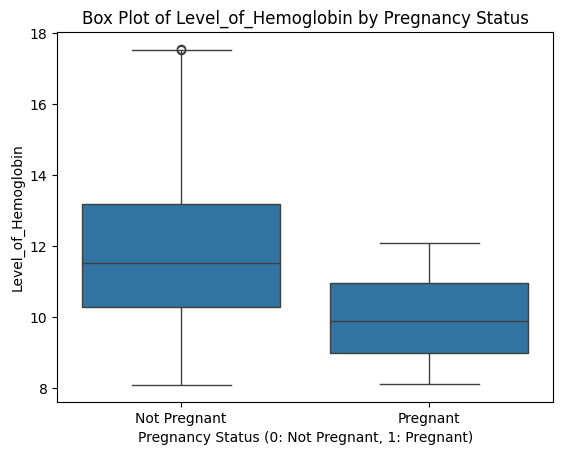

In [33]:
sns.boxplot(x='Pregnancy', y='Level_of_Hemoglobin', data=df_merged)
plt.xlabel('Pregnancy Status (0: Not Pregnant, 1: Pregnant)')
plt.ylabel('Level_of_Hemoglobin')
plt.title('Box Plot of Level_of_Hemoglobin by Pregnancy Status')
plt.xticks([0, 1], ['Not Pregnant', 'Pregnant'])
plt.show()

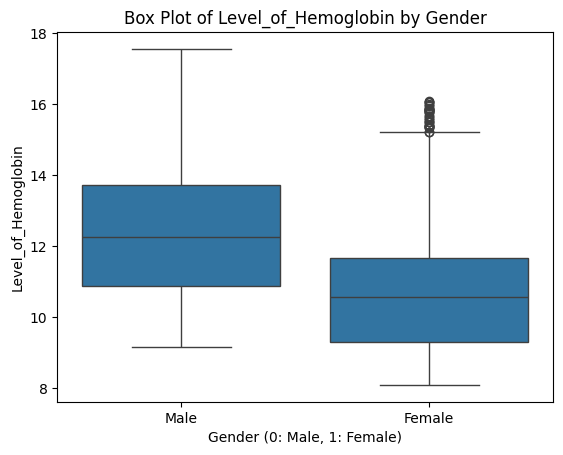

In [34]:
sns.boxplot(x='Sex', y='Level_of_Hemoglobin', data=df_merged)
plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('Level_of_Hemoglobin')
plt.title('Box Plot of Level_of_Hemoglobin by Gender')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

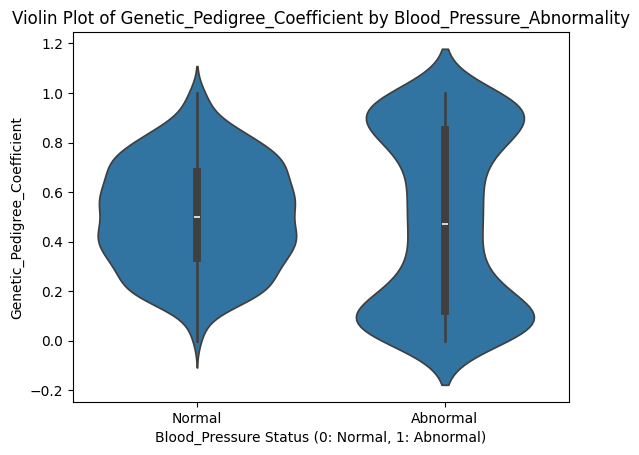

In [35]:
sns.violinplot(x='Blood_Pressure_Abnormality', y='Genetic_Pedigree_Coefficient', data=df_merged)
plt.xlabel('Blood_Pressure Status (0: Normal, 1: Abnormal)')
plt.ylabel('Genetic_Pedigree_Coefficient')
plt.title('Violin Plot of Genetic_Pedigree_Coefficient by Blood_Pressure_Abnormality')
plt.xticks([0, 1], ['Normal', 'Abnormal'])
plt.show()

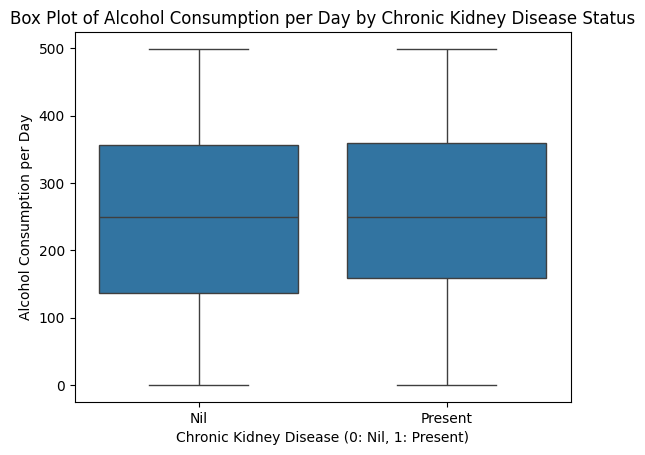

In [36]:
sns.boxplot(x='Chronic_kidney_disease', y='alcohol_consumption_per_day', data=df_merged)

# Customize the plot
plt.xlabel('Chronic Kidney Disease (0: Nil, 1: Present)')
plt.ylabel('Alcohol Consumption per Day')
plt.title('Box Plot of Alcohol Consumption per Day by Chronic Kidney Disease Status')
plt.xticks([0, 1], ['Nil', 'Present'])  # Rename the x-axis labels

# Show the plot
plt.show()

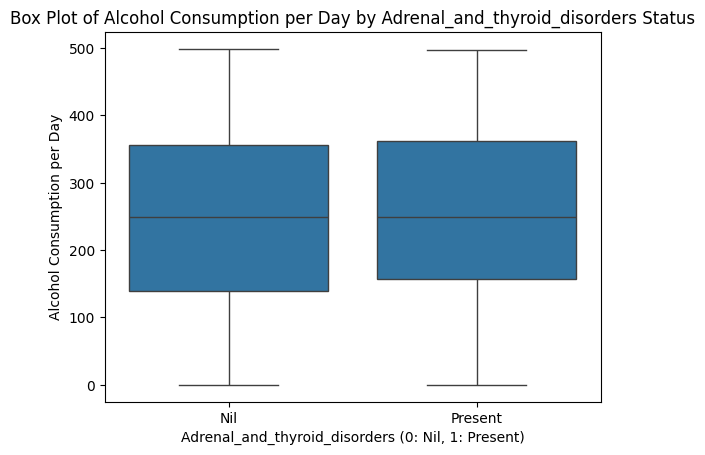

In [37]:
sns.boxplot(x='Adrenal_and_thyroid_disorders', y='alcohol_consumption_per_day', data=df_merged)

# Customize the plot
plt.xlabel('Adrenal_and_thyroid_disorders (0: Nil, 1: Present)')
plt.ylabel('Alcohol Consumption per Day')
plt.title('Box Plot of Alcohol Consumption per Day by Adrenal_and_thyroid_disorders Status')
plt.xticks([0, 1], ['Nil', 'Present'])  # Rename the x-axis labels

# Show the plot
plt.show()

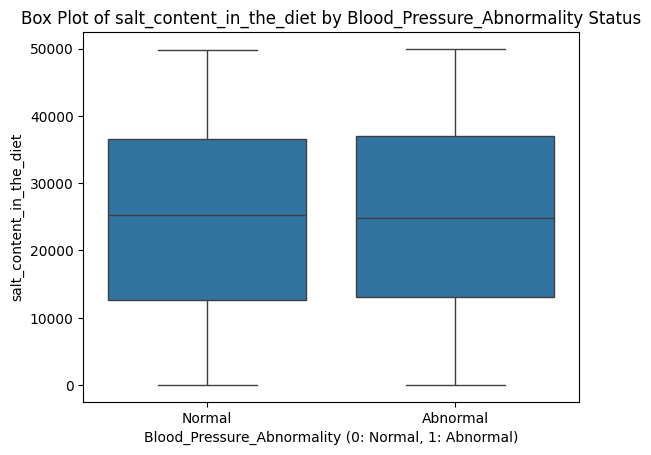

In [54]:
sns.boxplot(x='Blood_Pressure_Abnormality', y='salt_content_in_the_diet', data=df_merged)

# Customize the plot
plt.xlabel('Blood_Pressure_Abnormality (0: Normal, 1: Abnormal)')
plt.ylabel('salt_content_in_the_diet')
plt.title('Box Plot of salt_content_in_the_diet by Blood_Pressure_Abnormality Status')
plt.xticks([0, 1], ['Normal', 'Abnormal'])  # Rename the x-axis labels

# Show the plot
plt.show()

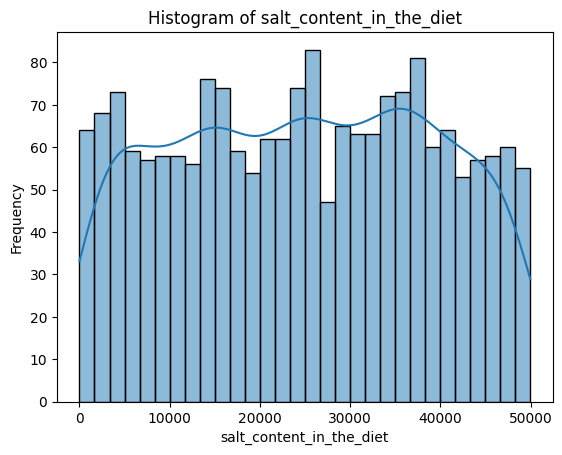

In [38]:
sns.histplot(df_merged['salt_content_in_the_diet'], bins=30, kde=True)
plt.xlabel('salt_content_in_the_diet')
plt.ylabel('Frequency')
plt.title('Histogram of salt_content_in_the_diet')
plt.show()

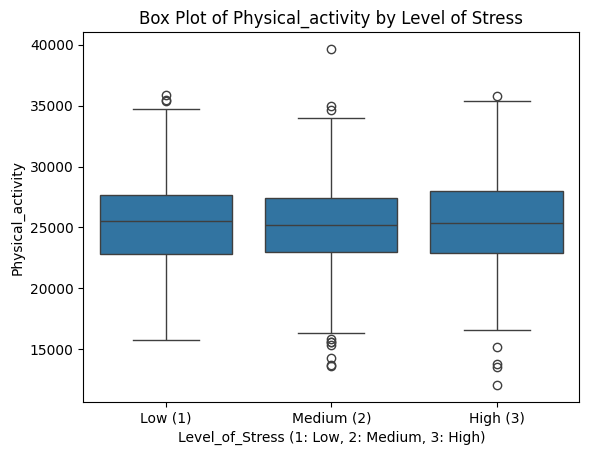

In [39]:
sns.boxplot(x='Level_of_Stress', y='Physical_activity', data=df_merged)

# Customize the plot
plt.xlabel('Level_of_Stress (1: Low, 2: Medium, 3: High)')
plt.ylabel('Physical_activity')
plt.title('Box Plot of Physical_activity by Level of Stress')
plt.xticks([0, 1, 2], ['Low (1)', 'Medium (2)', 'High (3)'])
plt.show()

In [40]:
Q1 = df_merged['Physical_activity'].quantile(0.25)
Q3 = df_merged['Physical_activity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_merged[(df_merged['Physical_activity'] < lower_bound) | (df_merged['Physical_activity'] > upper_bound)]

In [41]:
len(outliers)

17

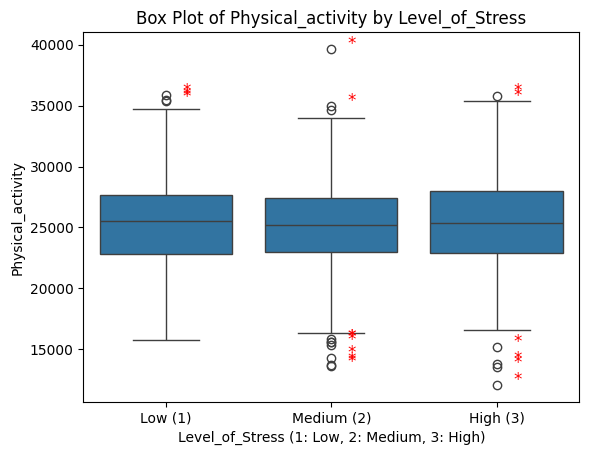

In [42]:
sns.boxplot(x='Level_of_Stress', y='Physical_activity', data=df_merged)
plt.xlabel('Level_of_Stress (1: Low, 2: Medium, 3: High)')
plt.ylabel('Physical_activity')
plt.title('Box Plot of Physical_activity by Level_of_Stress')
plt.xticks([0, 1, 2], ['Low (1)', 'Medium (2)', 'High (3)'])

# Highlight outliers
for index, row in outliers.iterrows():
    plt.text(0.1 + row['Level_of_Stress'] - 1, row['Physical_activity'], '*', color='red', fontsize=12)

plt.show()

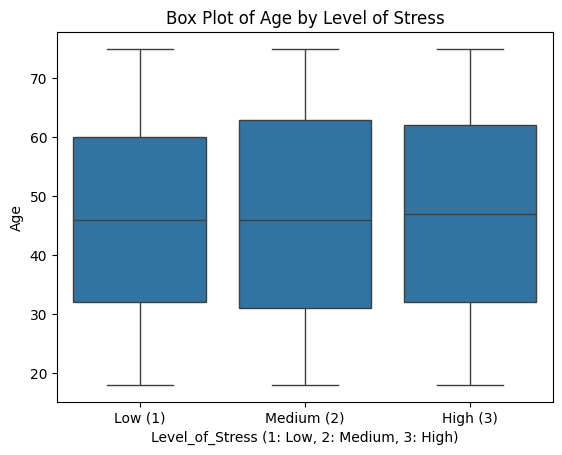

In [43]:
sns.boxplot(x='Level_of_Stress', y='Age', data=df_merged)

# Customize the plot
plt.xlabel('Level_of_Stress (1: Low, 2: Medium, 3: High)')
plt.ylabel('Age')
plt.title('Box Plot of Age by Level of Stress')
plt.xticks([0, 1, 2], ['Low (1)', 'Medium (2)', 'High (3)'])
plt.show()

In [44]:
##Null hypothesis ->There is no relation between smoking and blood pressure abnormality
contingency_table = pd.crosstab(df_merged['Smoking'], df_merged['Blood_Pressure_Abnormality'])
print(contingency_table)

Blood_Pressure_Abnormality    0    1
Smoking                             
0                           468  468
1                           483  489


In [45]:
# Perform Chi-Square Test and got p-value>0.05 so accepting the null hypothesis
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f'Chi-Square Statistic: {chi2}, p-value: {p}')

Chi-Square Statistic: 0.007920694475681807, p-value: 0.9290832742331536


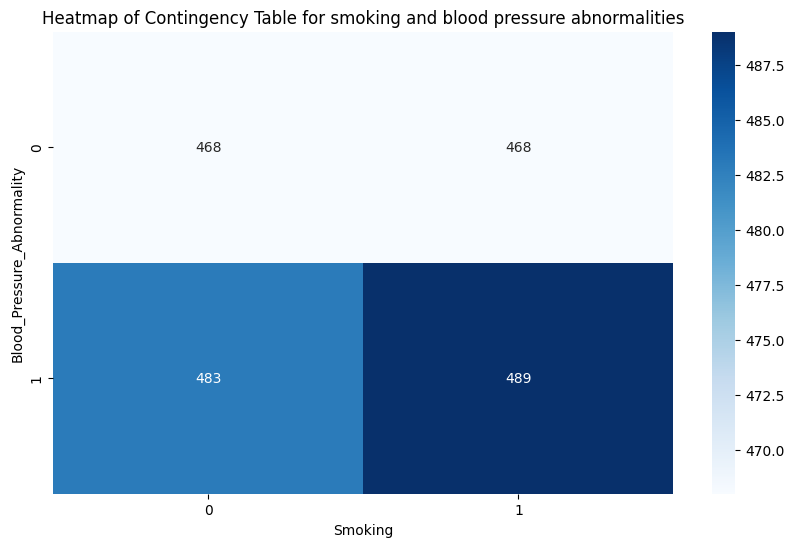

In [46]:
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Smoking')
plt.ylabel('Blood_Pressure_Abnormality')
plt.title('Heatmap of Contingency Table for smoking and blood pressure abnormalities')
plt.show()

In [47]:
##Null hypothesis ->There is no relation between Sex and Pregnancy
contingency_table = pd.crosstab(df_merged['Sex'], df_merged['Pregnancy'])
print(contingency_table)

Pregnancy  0.0  1.0
Sex                
0          967    0
1          752  189


In [48]:
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f'Chi-Square Statistic: {chi2}, p-value: {p}')

Chi-Square Statistic: 213.33167739156193, p-value: 2.5764088719016288e-48


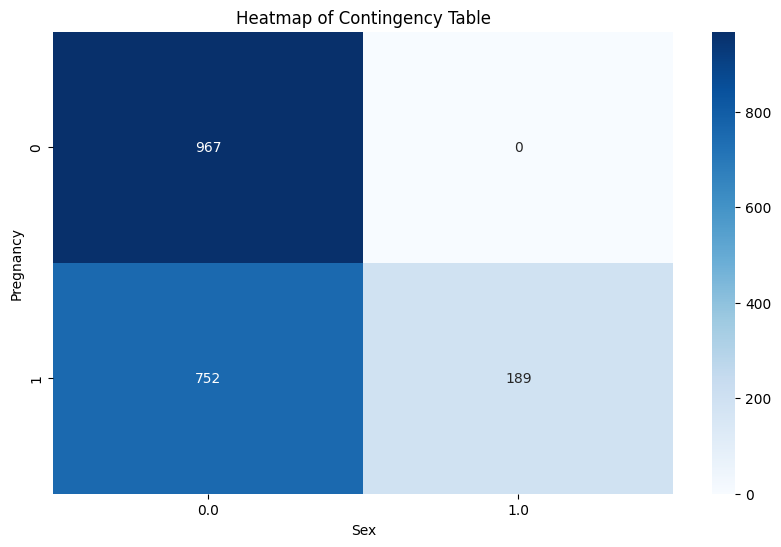

In [49]:
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Sex')
plt.ylabel('Pregnancy')
plt.title('Heatmap of Contingency Table')
plt.show()

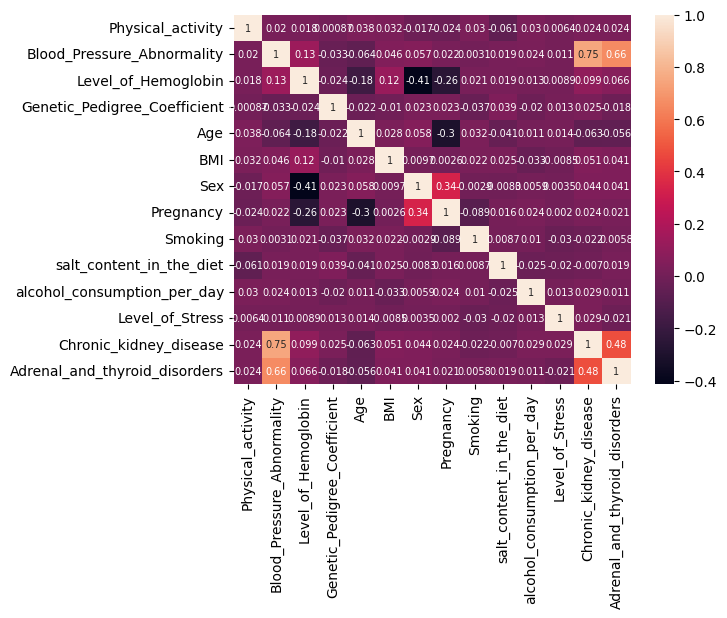

In [50]:
corr_matrix = df_merged.corr()
sns.heatmap(corr_matrix, annot=True,annot_kws={"size": 7})
plt.show()

In [51]:
X = df_merged[['Blood_Pressure_Abnormality', 'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders']]  
X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                         feature       VIF
0                          const  2.006309
1     Blood_Pressure_Abnormality  3.128408
2         Chronic_kidney_disease  2.297200
3  Adrenal_and_thyroid_disorders  1.768669


In [52]:
##calculate feature importance w.r.t BP
X = df_merged.drop(columns=['Blood_Pressure_Abnormality'])
y = df_merged['Blood_Pressure_Abnormality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))


                          Feature  Importance
11         Chronic_kidney_disease    0.352807
12  Adrenal_and_thyroid_disorders    0.263385
2    Genetic_Pedigree_Coefficient    0.131631
1             Level_of_Hemoglobin    0.122265
0               Physical_activity    0.025198
8        salt_content_in_the_diet    0.024299
9     alcohol_consumption_per_day    0.022334
3                             Age    0.021225
4                             BMI    0.018658
10                Level_of_Stress    0.006009
5                             Sex    0.005623
7                         Smoking    0.004184
6                       Pregnancy    0.002381


In [53]:
# df_merged.to_csv("health_data_merged.csv")